___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("Autoscout_data_Final_ML.csv")

In [3]:
df.head()

,price,km,registration,prev_owner,power_hp,door_nr,seat_nr,displacement,cylinders,weight,consumption_comb,CO2_emission,gears,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,...,model_Duster,model_Espace,model_Insignia,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,vehicle_condition_Demonstration,vehicle_condition_Employee's car,vehicle_condition_New,vehicle_condition_Pre-registered,vehicle_condition_Used,Inspection_new_No,Inspection_new_Yes,body_color_Black,body_color_Blue,body_color_Grey,body_color_Red,body_color_Silver,body_color_White,body_color_other,paintwork_Metallic,paintwork_Perl effect,paintwork_Uni/basic,upholstery_Cloth,upholstery_Full leather,upholstery_Other,upholstery_Part leather,upholstery_Velour,upholstery_alcantara,gear_Automatic,gear_Manual,gear_Semi-automatic,fuel_Diesel,fuel_Electric,fuel_benzine,fuel_lpg,emission_class_Euro 4,emission_class_Euro 5,emission_class_Euro 6,emission_class_Euro 6c,emission_class_Euro 6d,emission_class_Euro 6d-TEMP
0,15770,56013.0,2016.0,2.0,66.0,5.0,5.0,1422.0,3.0,1220.0,4.6,99.0,6.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
1,14500,80000.0,2017.0,1.0,141.0,3.0,4.0,1798.0,4.0,1255.0,5.6,129.0,7.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,14640,83450.0,2016.0,1.0,85.0,4.0,4.0,1598.0,3.0,1163.0,4.6,99.0,6.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
3,14500,73000.0,2016.0,1.0,66.0,3.0,4.0,1422.0,3.0,1195.0,4.6,99.0,6.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,16790,16200.0,2016.0,1.0,66.0,5.0,5.0,1422.0,3.0,1163.0,4.1,109.0,6.0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [4]:
df.shape

(15919, 166)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Columns: 166 entries, price to emission_class_Euro 6d-TEMP
dtypes: float64(12), int64(154)
memory usage: 20.2 MB


In [6]:
df.isnull().sum().sum()  # missing value olup olmadığına baktım.

0

In [7]:
df.describe()

,price,km,registration,prev_owner,power_hp,door_nr,seat_nr,displacement,cylinders,weight,consumption_comb,CO2_emission,gears,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,...,model_Duster,model_Espace,model_Insignia,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,vehicle_condition_Demonstration,vehicle_condition_Employee's car,vehicle_condition_New,vehicle_condition_Pre-registered,vehicle_condition_Used,Inspection_new_No,Inspection_new_Yes,body_color_Black,body_color_Blue,body_color_Grey,body_color_Red,body_color_Silver,body_color_White,body_color_other,paintwork_Metallic,paintwork_Perl effect,paintwork_Uni/basic,upholstery_Cloth,upholstery_Full leather,upholstery_Other,upholstery_Part leather,upholstery_Velour,upholstery_alcantara,gear_Automatic,gear_Manual,gear_Semi-automatic,fuel_Diesel,fuel_Electric,fuel_benzine,fuel_lpg,emission_class_Euro 4,emission_class_Euro 5,emission_class_Euro 6,emission_class_Euro 6c,emission_class_Euro 6d,emission_class_Euro 6d-TEMP
count,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.00000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,...,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000
mean,18019.896727,31996.797380,2017.611533,0.948678,88.500031,4.660594,4.952886,1429.143853,3.815315,1320.001570,5.131221,118.238715,5.865255,0.957032,0.003895,0.465230,0.561153,0.016710,0.705949,0.000063,0.070545,0.773730,0.124757,0.058860,0.038068,0.197060,0.461775,0.175514,0.003015,0.600980,0.493310,0.214021,0.022614,0.707771,0.524530,0.038445,0.651486,0.226270,0.048244,0.378102,0.620328,0.931528,0.552547,0.455996,0.05239,0.149947,0.580124,0.023368,0.090898,0.002576,...,0.002136,0.062253,0.163201,0.198191,0.000503,0.001570,0.003518,0.018217,0.497833,0.223821,0.005528,0.050820,0.026760,0.973240,0.050003,0.063509,0.103650,0.085684,0.697154,0.753000,0.247000,0.248571,0.089893,0.236887,0.060117,0.103461,0.221434,0.039638,0.976757,0.000377,0.022866,0.788492,0.086877,0.023117,0.094164,0.003769,0.003581,0.458383,0.512155,0.029462,0.458509,0.000314,0.537157,0.004020,0.

In [8]:
# sns.heatmap(df, annot=True) net bir görüntü vermeyeceğinden feature lar arasında bir 
# multicollinearity durumunun olup olmadığına bakmak için bu func kullandık.

def color_red(val):   
    
    if (val > 0.90 and val < 0.99) and (val > -0.90 and val < -0.99) :  
        color = 'red'
    else:
        color = 'white'
    return f'color: {color}'

In [9]:
pd.DataFrame(df).corr().style.applymap(color_red)

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [9]:
X = df.drop(columns ="price") # burada target column düşürdüm ve bağımsız değişkenleri belirledim.
y = df["price"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [12]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11143, 165)
Train target shape   :  (11143,)
Test features shape  :  (4776, 165)
Test target shape    :  (4776,)


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [14]:
dir(df)

['ABS',
 'Armrest',
 'Bluetooth',
 'CO2_emission',
 'Immobilizer',
 'Isofix',
 'MP3',
 'Radio',
 'Sunroof',
 'T',
 'Television',
 'USB',
 'Windshield',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train) 

LinearRegression()

In [17]:
y_pred = model.predict(X_test)
y_pred

array([ 9792.97633264, 17862.57112228, 19584.91903655, ...,
        8184.24637465, 16172.3410316 , 22610.60956227])

In [18]:
model.coef_

array([-3.87900406e-02,  1.54076204e+03,  7.54812367e+01,  9.43497424e+01,
        4.01977861e+02,  4.03313178e+01, -9.56099410e-01, -3.49347274e+01,
       -8.27417354e-01,  4.85682592e+02, -9.10950548e+00,  5.22017051e+02,
        5.27179567e+02, -6.97839511e+01, -2.45246846e+00,  2.51584698e+02,
       -2.01835840e+02,  4.82048623e+01, -1.19546112e+03,  1.22466272e+02,
       -2.31060009e+00,  3.88415625e+01,  3.47581390e+02,  2.33948911e+03,
        4.61891643e+02,  1.18027955e+02,  1.74738967e+02, -6.36053080e+02,
        1.75559160e+02,  1.46292806e+02, -2.54857917e+02,  4.89690167e+02,
        9.17662540e+01,  2.64983584e+02, -2.16224745e+02,  5.68627942e+02,
       -1.07416141e+01,  1.01893793e+03,  2.84193748e+02, -4.14453835e+02,
        3.35349590e+01, -1.80099175e+02, -1.75405690e+01,  6.25972857e+02,
       -2.11580753e+02, -1.04704875e+02,  5.96303072e+02, -3.46287616e+01,
       -7.56787533e+02, -2.61535903e+02, -4.94279441e+02,  8.04415765e+01,
        7.88144845e+02,  

In [19]:
model.intercept_  # intercept değeri niye böyle çıktı???

-3100382.2118026945

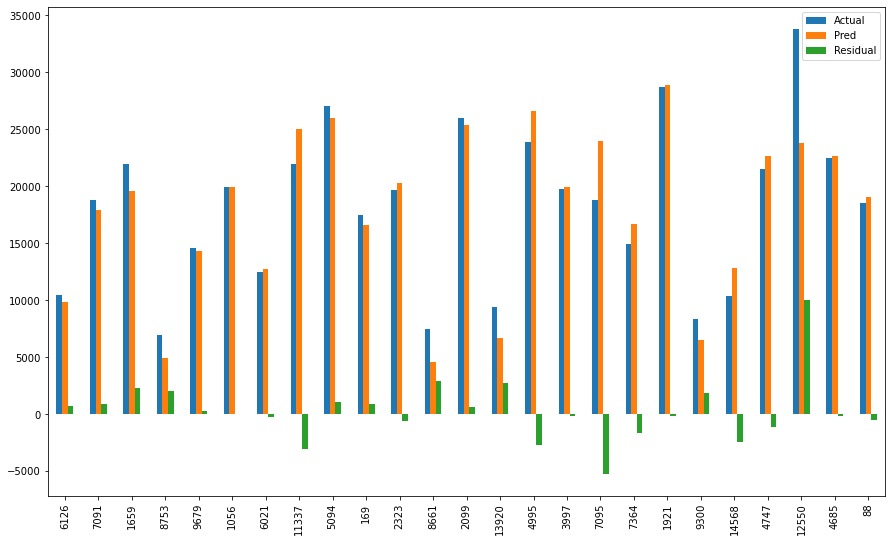

In [20]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}
comparing = pd.DataFrame(my_dict)
result_sample = comparing.head(25)
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()
# modelimin y_test ile y_pred değerleri arasındaki farkın dağılımını görmek için 
# oluşan df ten 25 gözlem alarak inceliyorum.

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
R2_score = r2_score(y_test, y_pred) 

In [23]:
mae = mean_absolute_error(y_test, y_pred)

In [24]:
mse = mean_squared_error(y_test, y_pred)

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [26]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [27]:
eval_metric(y_test, y_pred)  # önce test seti ile modelimize verdiği score lara bakıyorum.

Model testing performance:
--------------------------
R2_score 	: 0.8846103746784159
MAE 		: 1746.2712613565577
MSE 		: 6258879.1686695535
RMSE 		: 2501.7752034644427


In [28]:
y_train_pred = model.predict(X_train)  

# daha sonra train seti ile de modelime tahmin yaptırıp bunun score larını bakıyorum. 
# Amacım acaba train ile test seti arasında ciddi bir fark var mı veya bir underfitting/overfitting durumu var mı sorusuna cevap bulmak için.

In [29]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8935675853732944
MAE 		: 1692.2935272250127
MSE 		: 5820278.950516458
RMSE 		: 2412.525430024823


### Linear Reg with CV

In [30]:
from sklearn.model_selection import cross_validate, cross_val_score

In [31]:
# score ları görmek için bu func kullandım.

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [32]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [33]:
pd.DataFrame(scores, index = range(1,6))  # her bir CV için score lara baktım.

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.053865,0.005977,0.891711,-1742.719979,-6.178681e+06,-2485.695282
2,0.061794,0.005981,0.886555,-1712.363450,-5.852802e+06,-2419.256394
3,0.034620,0.015624,0.885809,-1729.177695,-5.751413e+06,-2398.210424
4,0.039204,0.000000,0.888123,-1768.269620,-6.903727e+06,-2627.494509
5,0.048520,0.015755,0.890026,-1669.717091,-5.782732e+06,-2404.731158


In [34]:
scores = pd.DataFrame(scores, index=range(1,6))  # CV sonucu oluşan ortalama score lara baktım.
scores.iloc[:, 2:].mean()

test_r2                             8.884447e-01
test_neg_mean_absolute_error       -1.724450e+03
test_neg_mean_squared_error        -6.093871e+06
test_neg_root_mean_squared_error   -2.467078e+03
dtype: float64

In [35]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls 

# train ve test setleri için score lara baktım.

,linear_train,linear_test
R2,8.935676e-01,8.846104e-01
mae,1.692294e+03,1.746271e+03
mse,5.820279e+06,6.258879e+06
rmse,2.412525e+03,2.501775e+03


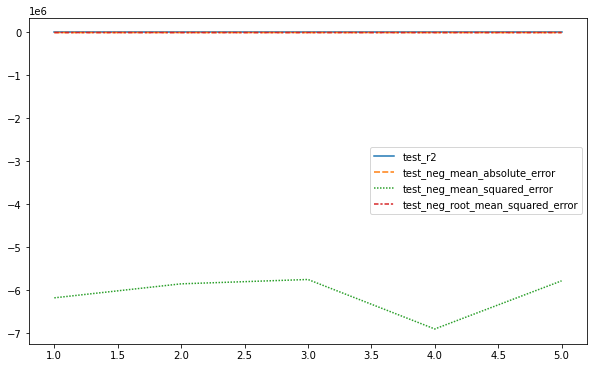

In [36]:
sns.lineplot(data = scores.iloc[:,2:]);

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler() 

In [39]:
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train) 
X_train_scaled

array([[5.44893763e-01, 0.00000000e+00, 2.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.37183002e-02, 6.66666667e-01, 2.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.43766278e-01, 0.00000000e+00, 2.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.93660041e-02, 6.66666667e-01, 2.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.42700480e-06, 6.66666667e-01, 2.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.51130912e-02, 6.66666667e-01, 2.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [40]:
X_test_scaled = scaler.transform(X_test) 
X_test_scaled

array([[0.26630912, 0.        , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.09805346, 0.66666667, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.04598012, 0.66666667, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.37011652, 0.        , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.03416724, 0.66666667, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.03620288, 0.66666667, 0.25      , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
from sklearn.linear_model import Ridge

In [43]:
ridge_model = Ridge(alpha=1, random_state=42)  # alpha default 1. 

In [44]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [45]:
# hem scaling yapılmış test hemde train set için tahminde bulundum.
y_pred = ridge_model.predict(X_test_scaled)  
y_train_pred = ridge_model.predict(X_train_scaled)

In [46]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,8.934965e-01,8.847049e-01
mae,1.690860e+03,1.743522e+03
mse,5.824168e+06,6.253750e+06
rmse,2.413331e+03,2.500750e+03


In [47]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,8.935676e-01,8.846104e-01,8.934965e-01,8.847049e-01
mae,1.692294e+03,1.746271e+03,1.690860e+03,1.743522e+03
mse,5.820279e+06,6.258879e+06,5.824168e+06,6.253750e+06
rmse,2.412525e+03,2.501775e+03,2.413331e+03,2.500750e+03


### For Ridge Regression CV with alpha : 1 

In [49]:
model = Ridge(alpha=1, random_state=42) 
# modelimizi burada bir data leakage durumu söz konusu olmasın diye sıfırladım.
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [50]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.036880,0.001990,0.891844,-1738.137722,-6.171072e+06,-2484.164252
2,0.041861,0.003038,0.887082,-1708.533896,-5.825607e+06,-2413.629437
3,0.039880,0.001989,0.886624,-1724.714527,-5.710331e+06,-2389.629913
4,0.019712,0.000000,0.887875,-1766.728074,-6.919035e+06,-2630.405780
5,0.031849,0.000000,0.890341,-1666.239836,-5.766152e+06,-2401.281347


In [51]:
scores = pd.DataFrame(scores, index = range(1, 6))  # CV ler için ortalama  metric score larına baktım.
scores.iloc[:,2:].mean()

test_r2                             8.887534e-01
test_neg_mean_absolute_error       -1.720871e+03
test_neg_mean_squared_error        -6.078439e+06
test_neg_root_mean_squared_error   -2.463822e+03
dtype: float64

In [52]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,8.934965e-01,8.847049e-01
mae,1.690860e+03,1.743522e+03
mse,5.824168e+06,6.253750e+06
rmse,2.413331e+03,2.500750e+03


<AxesSubplot:>

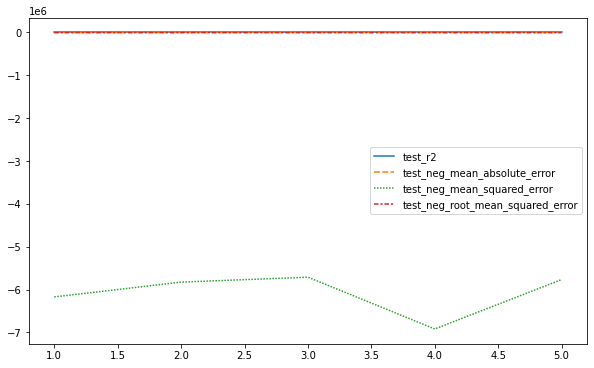

In [53]:
sns.lineplot(data = scores.iloc[:,2:])

### Choosing best alpha value with CV

In [54]:
from sklearn.linear_model import RidgeCV  # en iyi alpha değerini buluyoruz.

In [55]:
alpha_space = np.linspace(0.01, 1, 100)   # alpha değeri için bir aralık girdim.
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [56]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [57]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [58]:
print(ridge_cv_model.alpha_)
print(ridge_cv_model.best_score_)

1.0
-2463.822145651651


In [59]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [60]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,8.934965e-01,8.847049e-01
mae,1.690860e+03,1.743522e+03
mse,5.824168e+06,6.253750e+06
rmse,2.413331e+03,2.500750e+03


In [61]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,8.935676e-01,8.846104e-01,8.934965e-01,8.847049e-01,8.934965e-01,8.847049e-01
mae,1.692294e+03,1.746271e+03,1.690860e+03,1.743522e+03,1.690860e+03,1.743522e+03
mse,5.820279e+06,6.258879e+06,5.824168e+06,6.253750e+06,5.824168e+06,6.253750e+06
rmse,2.412525e+03,2.501775e+03,2.413331e+03,2.500750e+03,2.413331e+03,2.500750e+03


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [62]:
from sklearn.linear_model import Lasso, LassoCV

In [63]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [64]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [65]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,8.931958e-01,8.848038e-01
mae,1.691736e+03,1.741534e+03
mse,5.840611e+06,6.248386e+06
rmse,2.416736e+03,2.499677e+03


In [66]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,8.935676e-01,8.846104e-01,8.934965e-01,8.847049e-01,8.934965e-01,8.847049e-01,8.931958e-01,8.848038e-01
mae,1.692294e+03,1.746271e+03,1.690860e+03,1.743522e+03,1.690860e+03,1.743522e+03,1.691736e+03,1.741534e+03
mse,5.820279e+06,6.258879e+06,5.824168e+06,6.253750e+06,5.824168e+06,6.253750e+06,5.840611e+06,6.248386e+06
rmse,2.412525e+03,2.501775e+03,2.413331e+03,2.500750e+03,2.413331e+03,2.500750e+03,2.416736e+03,2.499677e+03


### For Lasso CV with Default Alpha : 1

In [67]:
model = Lasso(alpha=1, random_state=42) # modeli sıfırladık.
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [68]:
pd.DataFrame(scores, index = range(1, 6))  # Default alpha 1 CV ye göre metric sonuçlarını gördük.

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.445262,0.0,0.892149,-1734.986519,-6.153712e+06,-2480.667556
2,0.361660,0.0,0.887387,-1705.942539,-5.809868e+06,-2410.366683
3,0.344855,0.0,0.887476,-1719.343344,-5.667428e+06,-2380.635996
4,0.281852,0.0,0.888608,-1761.086662,-6.873828e+06,-2621.798531
5,0.284398,0.0,0.891362,-1658.516614,-5.712435e+06,-2390.070084


In [69]:
scores = pd.DataFrame(scores, index = range(1, 6)) # CV ye göre metriclerin ortalamasını bulduk.
scores.iloc[:,2:].mean()  # Baktığımızda şu ana kadarki en iyi R2 score na ulaştık.

test_r2                             8.893964e-01
test_neg_mean_absolute_error       -1.715975e+03
test_neg_mean_squared_error        -6.043454e+06
test_neg_root_mean_squared_error   -2.456708e+03
dtype: float64

<AxesSubplot:>

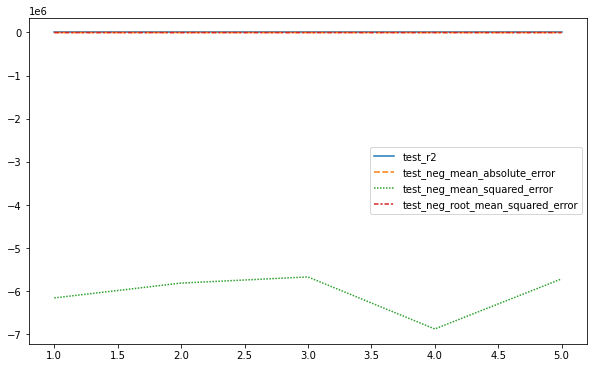

In [70]:
sns.lineplot(data = scores.iloc[:,2:])

### Choosing best alpha value with Cross-Validation

In [71]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [72]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [73]:
lasso_cv_model.alpha_ 

1.0

In [74]:
lasso_cv_model.mse_path_[-1].mean()  # Lasso best score döndürmediğinden bu şekilde aldık.

6092660.733493794

In [75]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha = 1)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [76]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,8.931958e-01,8.848038e-01
mae,1.691736e+03,1.741534e+03
mse,5.840611e+06,6.248386e+06
rmse,2.416736e+03,2.499677e+03


In [77]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1) # lasso CV ile lasso best alpha CV score nun aynı olduğun gördüm.

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,8.935676e-01,8.846104e-01,8.934965e-01,8.847049e-01,8.934965e-01,8.847049e-01,8.931958e-01,8.848038e-01,8.931958e-01,8.848038e-01
mae,1.692294e+03,1.746271e+03,1.690860e+03,1.743522e+03,1.690860e+03,1.743522e+03,1.691736e+03,1.741534e+03,1.691736e+03,1.741534e+03
mse,5.820279e+06,6.258879e+06,5.824168e+06,6.253750e+06,5.824168e+06,6.253750e+06,5.840611e+06,6.248386e+06,5.840611e+06,6.248386e+06
rmse,2.412525e+03,2.501775e+03,2.413331e+03,2.500750e+03,2.413331e+03,2.500750e+03,2.416736e+03,2.499677e+03,2.416736e+03,2.499677e+03


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [78]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [79]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # default değerlerini aldım.
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [80]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [81]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,6.253897e-01,6.307444e-01
mae,3.214462e+03,3.193511e+03
mse,2.048564e+07,2.002889e+07
rmse,4.526107e+03,4.475365e+03


In [82]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,8.935676e-01,8.846104e-01,8.934965e-01,8.847049e-01,8.934965e-01,8.847049e-01,8.931958e-01,8.848038e-01,8.931958e-01,8.848038e-01,6.253897e-01,6.307444e-01
mae,1.692294e+03,1.746271e+03,1.690860e+03,1.743522e+03,1.690860e+03,1.743522e+03,1.691736e+03,1.741534e+03,1.691736e+03,1.741534e+03,3.214462e+03,3.193511e+03
mse,5.820279e+06,6.258879e+06,5.824168e+06,6.253750e+06,5.824168e+06,6.253750e+06,5.840611e+06,6.248386e+06,5.840611e+06,6.248386e+06,2.048564e+07,2.002889e+07
rmse,2.412525e+03,2.501775e+03,2.413331e+03,2.500750e+03,2.413331e+03,2.500750e+03,2.416736e+03,2.499677e+03,2.416736e+03,2.499677e+03,4.526107e+03,4.475365e+03


In [ ]:
Baktığımda R2 score olarak en kötü score ları aldım.

### Tune alpha hyperparameter by using GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

In [88]:
elastic_model = ElasticNet(max_iter=100000, random_state=42)

In [89]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [90]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [91]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.5s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [92]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [93]:
grid_model.best_score_

-2456.7077698521357

### Using Best Hyper Parameters From GridSearch

In [94]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [95]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,8.931958e-01,8.848038e-01
mae,1.691736e+03,1.741534e+03
mse,5.840611e+06,6.248386e+06
rmse,2.416736e+03,2.499677e+03


In [ ]:
Görüldüğü gibi elastic best alpha CV ile de Lasso ile aldığım aynı R2 score aldım.

### Final Model

In [96]:
final_scaler = MinMaxScaler()
X_scaled = final_scaler.fit_transform(df)

In [97]:
final_model = Lasso(alpha=1) #lasso_cv_model

In [98]:
final_model.fit(X_scaled, y)

Lasso(alpha=1)

## 7. Visually Compare Models Performance In a Graph

In [118]:
# !pip install yellowbrick --user

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


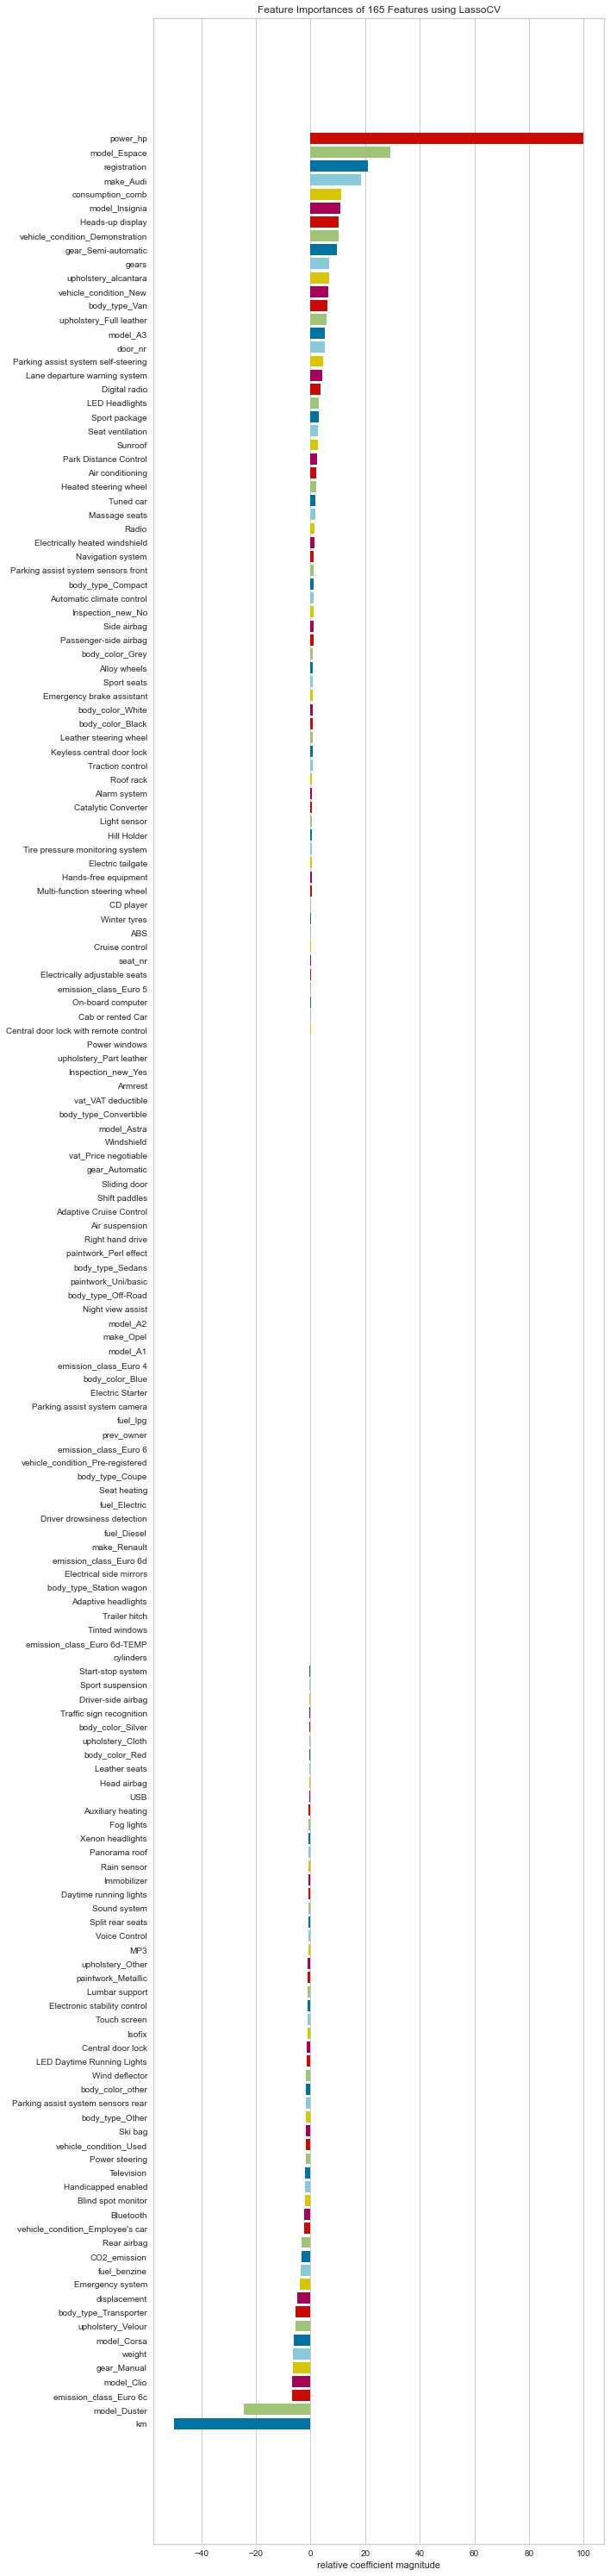

<AxesSubplot:title={'center':'Feature Importances of 165 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [100]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___